# Random Forest
A Random Forest Classifier is a decision based ensemble method that uses a series of decision trees to determine the class of our input variables. It works by selecting a random set of features at each node then averaging them together. This helps reduce overfitting by not emphasizing any one particular feature over another. We felt this was our next best choice after Logistic Regression because decision trees make no assumptions about the spread of the data and are very quick to train. Though this was not our production model we did spend a good amount of time searching through hyperparameters to find an optimum fit. Our results with this modelexhibited overfitting with a low amount of
predictive power on unseen data.


In [6]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Importing the Time Series split assets
With n_splits set at 3

In [7]:
X_train = pd.read_pickle('../assets/X_train.pkl')
X_test = pd.read_pickle('../assets/X_test.pkl')
y_train = pd.read_pickle('../assets/y_train.pkl')
y_test = pd.read_pickle('../assets/y_test.pkl')


In [8]:
X_train.columns

Index(['Latitude', 'Longitude', 'Month', 'Day_length_shift', 'Tavg_shift',
       'Heat_shift', 'Cool_shift', 'Tmax_shift', 'Tmin_shift', 'Depart_shift',
       'ResultSpeed_shift', 'ResultDir_shift', 'WetBulb_shift',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS'],
      dtype='object')

# Running a pipeline
With a standard scaler and a Random Forest Classifier

In [9]:
pipe = Pipeline([
    ('ss',StandardScaler()),
    ('rfc',RandomForestClassifier(n_jobs=3,
                                  n_estimators=200,
                                  random_state=42,
                                  criterion='entropy'))   
])

# Setting the range of hyperparameters 

In [17]:
param_grid =  {
    'rfc__min_samples_split': [10, 15, 20, 25, 30],
    'rfc__min_impurity_decrease': np.linspace(.00001, .001, 20)
}

# Gridsearching with  timeseries split
We used roc_auc as our scoring metric paired with a timeseries split.

In [18]:
gs = GridSearchCV(pipe, param_grid=param_grid,verbose=1,scoring='roc_auc', cv=TimeSeriesSplit())

In [19]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.7min finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease...imators=200, n_jobs=3,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rfc__min_samples_split': [10, 15, 20, 25, 30], 'rfc__min_impurity_decrease': array([1.00000e-05, 6.21053e-05, 1.14211e-04, 1.66316e-04, 2.18421e-04,
       2.70526e-04, 3.22632e-04, 3.74737e-04, 4.26842e-04, 4.78947e-04,
       5.31053e-04, 5.83158e-04, 6.35263e-04, 6.87368e-04, 7.39474e-04,
       7.91579e-04, 8.43684e-04, 8.95789e-04, 9.47895e-04, 1.00000e-03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score

# Scoring
Our data routinely overfit this dataset

In [20]:
gs.score(X_train,y_train)

0.9606158963805358

In [21]:
gs.score(X_test,y_test)


0.7235109617063802

In [22]:
def plot_hyperparamter(gs_object, param_grid, hp_name):
    test_scores = gs_object.cv_results_['mean_test_score']
    hp_values = param_grid[hp_name]
    plt.plot(hp_values, test_scores)
    plt.xlabel(hp_name)
    plt.ylabel('Test Score')

# plt.plot(param_grid['rfc__min_samples_split'],cv_results['mean_test_score'])

ValueError: x and y must have same first dimension, but have shapes (20,) and (100,)

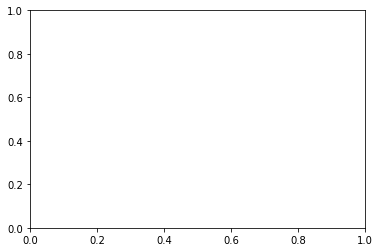

In [23]:
plot_hyperparamter(gs, param_grid, 'rfc__min_impurity_decrease')

In [ ]:
cv_results['mean_test_score']

In [ ]:
X_train_preds = gs.predict(X_train)

In [ ]:
preds = pd.DataFrame({
    "preds":X_train_preds,
    "truth":y_train
})


In [ ]:
preds.sum()

In [ ]:
gs.best_params_

# Feature importances


In [ ]:
feat_importances = pd.DataFrame(gs.best_estimator_.named_steps['rfc'].feature_importances_, X_train.columns, columns=['importance'])

In [ ]:
feat_importances.sort_values('importance', ascending=False)

In [20]:
# with open('../assets/rf_0925_303.pkl','wb+') as f:
#     pickle.dump(gs,f)